<a href="https://colab.research.google.com/github/KalpanaMehta/KalpanaMehta/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pwd

# !mkdir deepL
# %cd deepL


/content
/content/deepL


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 64)      256       
 chNormalization)                                            

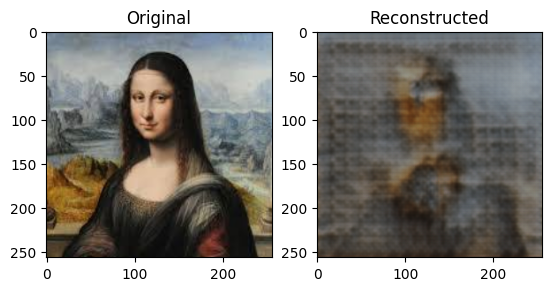

1/1 [==============================] - 2s 2s/step


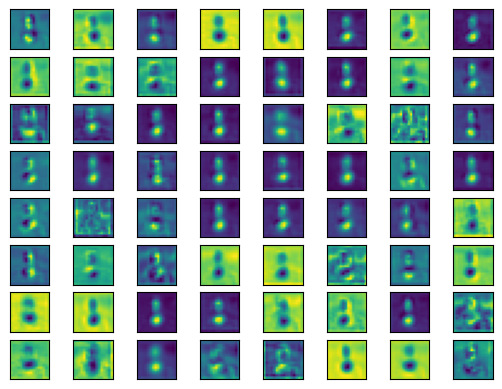

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model

SIZE=256
img_data=[]

img=cv2.imread('/content/deepL/monalisa.jpeg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


from models import build_autoencoder

model=build_autoencoder(img.shape)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
print(model.summary())


model.fit(img_array, img_array,
        epochs=500,
        shuffle=True)



pred = model.predict(img_array)


plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.title('Reconstructed')
plt.show()



model2 = build_autoencoder(img.shape)

my_model = model

#set intermediate representations for all layers in the model
# except for the first - as it is an input layer
outputs = [layer.output for layer in my_model.layers[1:]]

model_for_visualization = Model(inputs = my_model.input, outputs = outputs)


input_img = img_array
feature_maps = model_for_visualization.predict(input_img)

#layer_names = [layer.name for layer in model2.layers]

# plot all 64 maps in an 8x8 squares
#import random
#layer_num = random.randint(0, len(feature_maps)-1)
layer_num = 32 #Depth of layer...
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[layer_num][0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()